<b> Author: Sami Mwanje, mm223kk@student.lnu.se </b>

In [106]:
import numpy as np
import  pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


The numpy library is used to handle matrixes.

sklearn.svm is used for the SVC the SVM classfiers.

sklearn.model_selection is used for gird search.

matplot is used for the plots.

In [107]:
mnistTrain = np.asarray(pd.read_csv('mnistTrain.csv', delimiter=',')) # Read the minist data file.
mnistTest = np.asarray(pd.read_csv('mnistTest.csv', delimiter=',')) # Read the minist data file.

np.random.shuffle(mnistTrain)          # Shuffle rows in mnistTrain
np.random.shuffle(mnistTest)          # Shuffle rows in mnistTest

xTrain = np.array(mnistTrain[:10000,1:])
yTrain = np.array(mnistTrain[:10000,0])
#print('Training set X: %s,\nTraining set Y: %s' % (xTrain.shape, yTrain.shape )) # print the dimentions of the train data

#Divide the dataset into a training set of size.
xTest = np.array(mnistTest[:10000,1:])
yTest = np.array(mnistTest[:10000,0])
print('\nTest set X: %s,\nTest set Y: %s' % (xTest.shape, yTest.shape )) # print the dimentions of the train data


Test set X: (9999, 784),
Test set Y: (9999,)


The training set and test set is loaded from the data set using the pandas libarary.

The data is splited up into trainig set and test set.

Each set is split up into X-part, and Y-part.

Y-part containts the labels, and the X-part contains the features for the MNIST data set.

<b> Exercise 2.1:  One versus all MNIST </b>

In [108]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#000000']) # mesh plot
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#555353']) # colors

parameters = [6,7,8,9,10,11] # The values that are going to be checked.
#gamma = [1e-11,1e-10,1e-9,1e-8,1e-7,1e-6]
#Setting up the parameters to the SVC.
svcParameters = [{'kernel':['rbf'], 'C':parameters, 'gamma':['scale']}] # Gamma is set to scale 1 / (n_features * X.var()). Scale is much faster to handle.

print("Grid Search SVC:",svcParameters)
gridSearchCV = GridSearchCV(SVC(), svcParameters, cv = 5,n_jobs=-1)    # Prepare grid search for current SVC parameter.
gridSearchCV.fit(xTrain,yTrain)                              # Run gird search.
bestScore = abs(gridSearchCV.best_score_)                              # Check for best score.
bestParams = gridSearchCV.best_params_                                 # Check for best params.
print("Best paramrs: "+str(bestParams)+",\nTraining Score: " +str(bestScore)+"\n")

Grid Search SVC: [{'kernel': ['rbf'], 'C': [6, 7, 8, 9, 10, 11], 'gamma': ['scale']}]
Best paramrs: {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'},
Training Score: 0.962



Here grid search is used to search for the best paramas.

The C parameters a set to search between [7,8,9,10,11,12].

The gamma parameters are set to scale, which means (1 / (n_features * X.var())) .

<b> One versus all testing score: </b>

In [109]:
clf = SVC(kernel = str(bestParams["kernel"]),C = bestParams["C"], gamma = bestParams["gamma"])
clf.fit(xTrain,yTrain)                              # Run gird search.
bestScore = abs(clf.score(xTest,yTest))                     # Check for best score.
print("Test accuracy: " +str(bestScore)+"\n")

Test accuracy: 0.9700970097009701



A classifier is created using the training data with the grid searched parameters.

The score of the test set is is then check used the nearly created classifier.

The accuracy here is about 95+ % procent using the produced parameters.

In order to reach a test score over 95 %, the C and gamma parameters must be set correct.

<b> Exercise 2.2: Compare the built-in binarization scheme used for the SVC classs, namely one-vs-one, against the one-vs-all scheme, which was discussed in Lecture 5 </b>

Accuracy Score: 0.9727972797279728


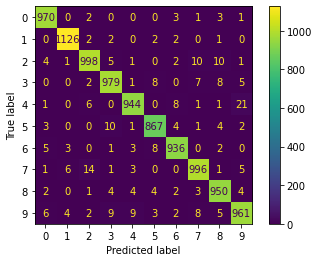

In [110]:
def OneVsAll(X,y):
    possibilities = np.unique(y)                                           # Load a possible values.
    classifiers = np.zeros((X.shape[0],possibilities.shape[0]))            # Create an array that is ready for the classes by adding zeros to all rows and columns. 
    for index in possibilities:
        currentY = (y == index).astype(int)                                # Check which index corresponds to current possible value.  Save as 1 or 0.             
        classifiers[:,index] = currentY                                    # Add value to array.

    probabilities = []                                                     # Array holding probalities.
    for index in possibilities:
        supportVector = SVC(kernel = str(bestParams["kernel"]),C = bestParams["C"], gamma = bestParams["gamma"],probability=True)   # Create the SVC using parameters.
        supportVector.fit(xTrain,classifiers[:,index])                                      # Train the SVM.
        probabilities.append(supportVector.predict_proba(xTest))                            # Append current predictions probability to array.

    confusionsmatrix = np.array(probabilities)[:,:,1].T                                     # Turn probailies to predictions array.
    print("Accuracy Score:", np.sum(yTest == np.argmax(confusionsmatrix,1))/yTest.shape[0]) # Count the accuracy of the predictions. By comparing the predictions with the actual value.
    cm = confusion_matrix(yTest, np.argmax(confusionsmatrix,axis=1))                        # Set the confusion matrix parameters.
    ConfusionMatrixDisplay(cm, display_labels=possibilities).plot()                         # Plot the confusion matrix with cm-parameters.
OneVsAll(xTrain,yTrain)

OneVsAll function that is used to turn all the corresponding values to zeros based on the current index. 
Example for value 9, all values that are 9 will become (true) 1 and so on...

The function then trains the SVM for each lavel, and predicts a value with probability.

The predictions are later on used to calculate the accuracy and a confusion matrix.

The accuracy does not differs very much from the "skilearn accuracy", though it is always 0-1 % better.

In the confusion matrix above we can see the errors which corresponds to the inaccuracy that we got. We see that most labels where predicted correct.

The most correct labels to predict were 1 and 0 which hand the least errors, by judging from what can be seen on the confusion matrix label 5 seems to be the 
one with most errors. Which indicates the hardest to predict.